Project Name

Ford GoBike Trip Data Analysis

Project Summary

This project analyzes a dataset containing 94,802 records of bike-sharing trips from the Ford GoBike system. The data includes trip duration, station information (start/end location and coordinates), user details (type, birth year, gender), and whether the trip was part of the "Bike Share for All" program. The analysis covers data cleaning (handling missing values and outliers), descriptive statistics, and prepares the dataset for further insights into usage patterns, station popularity, and user demographics.

Business Objective

The main business objective is to uncover actionable insights that can help Ford GoBike. This includes:

Identifying popular routes and stations to improve bike and dock allocation.

Understanding user demographics and trip behaviors to tailor marketing and service offerings.

Detecting operational inefficiencies and opportunities for expansion or improvement in service areas.

Problem Statement

How can Ford GoBike leverage trip and user data to improve operational efficiency, enhance user experience, and increase overall ridership? Specifically, the project seeks to address:

Which stations and routes are most and least utilized?

What are the usage patterns across different user types, ages, and genders?

Are there operational bottlenecks or under-served areas that can be addressed to boost ?
s data
What chart type is most effective for displayng corr??elations
Which chart type is ideal for presentin trends ??over time


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv('Fordgobike.csv')

# Displaying few rows 
print(df.head())

   duration_sec start_time end_time  start_station_id  \
0         75284    52:35.2  47:19.8               120   
1         85422    13:34.4  57:17.3                15   
2         71576    23:55.9  16:52.1               304   
3         61076    53:23.6  51:20.5                75   
4         39966    52:24.7  58:31.1                74   

                                  start_station_name  start_station_latitude  \
0                               Mission Dolores Park               37.761420   
1  San Francisco Ferry Building (Harry Bridges Pl...               37.795392   
2                               Jackson St at 5th St               37.348759   
3                           Market St at Franklin St               37.773793   
4                              Laguna St at Hayes St               37.776435   

   start_station_longitude  end_station_id  \
0              -122.426435             285   
1              -122.394203              15   
2              -121.894798            

>Understanding dataset variable

1. duration_sec: Trip duration in seconds.
2. start_time: Start time of the trip.
3. end_time: End time of the trip.
4. start_station_id: ID of the starting station.
5. start_station_name: Name of the starting station.
6. start_station_latitude: Latitude of the starting station.
7. start_station_longitude: Longitude of the starting station.
8. end_station_id: ID of the ending station.
9. end_station_name: Name of the ending station.
10. end_station_latitude: Latitude of the ending station.
11. end_station_longitude: Longitude of the ending station.
12. bike_id: ID of the bike used for the trip.
13. user_type: Type of user (Subscriber or Customer).
14. member_birth_year: Birth year of the member.
15. member_gender: Gender of the member.
16. bike_share_for_all_trip: Indicates if the trip was part of the "Bike Share for All" program.

In [4]:
# Data Summary
print("\nData Summary:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7839
member_gender              7801
bike_share_for_all_trip       0
dtype: int64


In [6]:
# Fill missing values

df['member_birth_year'] = df['member_birth_year'].fillna(df['member_birth_year'].median()).astype(int)
df['member_gender'] = df['member_gender'].fillna('UNKNOWN')
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64


In [7]:
# Convert to category where appropriate
categorical_columns = [
    'start_station_id', 'start_station_name',
    'end_station_id', 'end_station_name',
    'bike_id', 'user_type', 'member_gender',
    'bike_share_for_all_trip'
]
df[categorical_columns] = df[categorical_columns].astype('category')

# Verify DataFrame after transformations
print("\nDataFrame Info After Transformations:")
print(df.info())


DataFrame Info After Transformations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   duration_sec             94802 non-null  int64   
 1   start_time               94802 non-null  object  
 2   end_time                 94802 non-null  object  
 3   start_station_id         94802 non-null  category
 4   start_station_name       94802 non-null  category
 5   start_station_latitude   94802 non-null  float64 
 6   start_station_longitude  94802 non-null  float64 
 7   end_station_id           94802 non-null  category
 8   end_station_name         94802 non-null  category
 9   end_station_latitude     94802 non-null  float64 
 10  end_station_longitude    94802 non-null  float64 
 11  bike_id                  94802 non-null  category
 12  user_type                94802 non-null  category
 13  member_birth_year     

Reason for Keeping start_time and end_time as Object Format:
No Exact Start Time: Temporal analysis requires knowing when an event occurred (like "April 10, 2025, at 3:15 PM"). This data only tells us how long the trip lasted, not when it started.
Since there's no actual timestamps, we can't:

1. Analyze hourly/daily trends (e.g., “Which hour has the most rides?”).

2. Study seasonal effects (weekdays vs weekends, holiday impacts).

3. Explore time-dependent correlations like rush-hour traffic.

If we need time-based trends, you’ll need a dataset that includes actual dates & times. Want to dig deeper into station-based trends or trip durations?
Hourly Trends Can't Be Tracked: Without proper timestamps, we can't analyze patterns like "Which hour had the most trips?" or "Do people ride more in the morning or evening?

In [8]:
# Finding outliars 

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Check for outliers in duration, birth year, and station coordinates
outliers_duration = find_outliers_iqr(df, 'duration_sec')
outliers_birth_year = find_outliers_iqr(df, 'member_birth_year')
outliers_latitude = find_outliers_iqr(df, 'start_station_latitude')

print("Outliers in Trip Duration:")
print(outliers_duration.shape[0])

print("\nOutliers in Member Birth Year:")
print(outliers_birth_year.shape[0])

print("\nOutliers in Start Station Latitude:")
print(outliers_latitude.shape[0])


Outliers in Trip Duration:
5643

Outliers in Member Birth Year:
2712

Outliers in Start Station Latitude:
10732


In [9]:
# Percentage of outliars
#Total number of rows in the dataset
total_rows = df.shape[0]

# Function to calculate outlier percentage
def calculate_outlier_percentage(outliers_df, total_rows):
    return (outliers_df.shape[0] / total_rows) * 100

# Compute percentage of outliers for each column
duration_outlier_pct = calculate_outlier_percentage(outliers_duration, total_rows)
birth_year_outlier_pct = calculate_outlier_percentage(outliers_birth_year, total_rows)
latitude_outlier_pct = calculate_outlier_percentage(outliers_latitude, total_rows)

# Display results
print(f"Percentage of Outliers in Duration: {duration_outlier_pct:.2f}%")
print(f"Percentage of Outliers in Member Birth Year: {birth_year_outlier_pct:.2f}%")
print(f"Percentage of Outliers in Start Station Latitude: {latitude_outlier_pct:.2f}%")


Percentage of Outliers in Duration: 5.95%
Percentage of Outliers in Member Birth Year: 2.86%
Percentage of Outliers in Start Station Latitude: 11.32%


We’re keeping the outliers because they represent real, valid data—not errors or mistakes. Instead of removing them, we can use them to uncover valuable insights.

>What did I know about this dataset?

The dataset contains 94,802 bike-sharing trips with 16 columns covering trip details, user info, and station locations.

✅ Data Cleaning: Missing values in member_birth_year were filled with the median, and member_gender set to "UNKNOWN."
No duplicate rows.
✅ Key Stats: Avg trip duration = 871 sec, avg birth year = 1981, stations centered around San Francisco.
✅ Outliers: 6% trip durations, 2.9% birth years, 11.3% start station latitudes—retained for valid insights.
❌ Limitations: start_time and end_time aren’t true timestamps, restricting time-based analysis.

Final Status: The dataset is clean and ready for trip patterns, station usage, and user demographics analysis


Exploratory Data Analysis

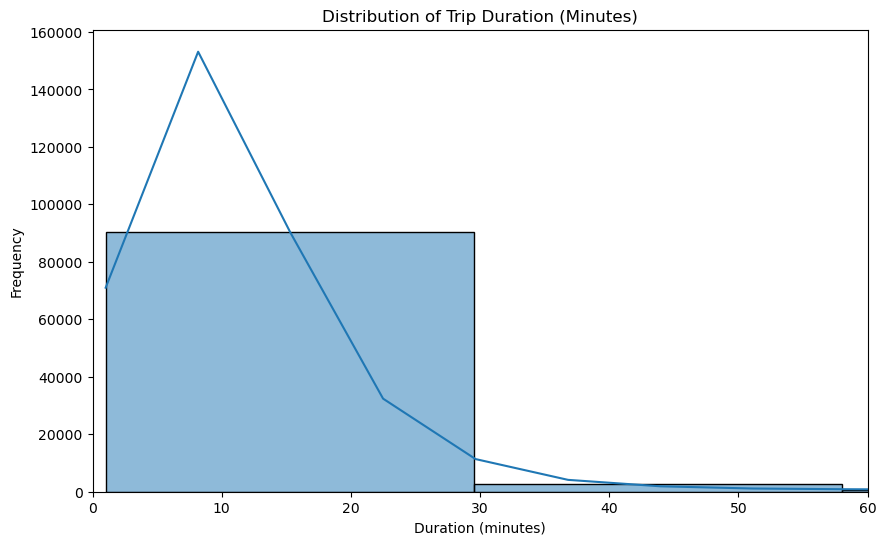

count    94802.000000
mean        14.515599
std         42.509948
min          1.016667
25%          5.983333
50%          9.250000
75%         14.233333
90%         21.566667
95%         28.650000
99%        106.849833
max       1425.766667
Name: duration_minutes, dtype: float64
Number of potential outlier trips: 949


In [10]:
#Univariate Analysis
#Trip Duration Analysis

# Convert seconds to minutes for better interpretation
df['duration_minutes'] = df['duration_sec'] / 60

# Visualize distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_minutes'], bins=50, kde=True)
plt.xlim(0, 60)  # Focus on trips under an hour
plt.title('Distribution of Trip Duration (Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Examine potential outliers
print(df['duration_minutes'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))
outliers = df[df['duration_minutes'] > df['duration_minutes'].quantile(0.99)]
print(f"Number of potential outlier trips: {len(outliers)}")


Q: Why did we pick this chart? 
A: A histogram best visualizes trip duration distribution, highlighting common patterns, anomalies, and variability.

Q: What insights were found from this chart? 
A:Most durations are around 10 minutes, with fewer longer ones. The data is right-skewed, meaning a few extreme values pull the distribution. Most activities are brief, suggesting efficiency or user preference.

Q: Will these insights help create a positive business impact? 
A: Yes! These findings support Ford’s optimization efforts:
   Improve bike and dock allocation based on usage trends.
   Refine pricing models to encourage quick returns.
   Enhance station placement to prevent extended trip durations.
   Investigate outliers to address inefficiencies or potential data issues.


user_type
Subscriber    82458
Customer      12344
Name: count, dtype: int64


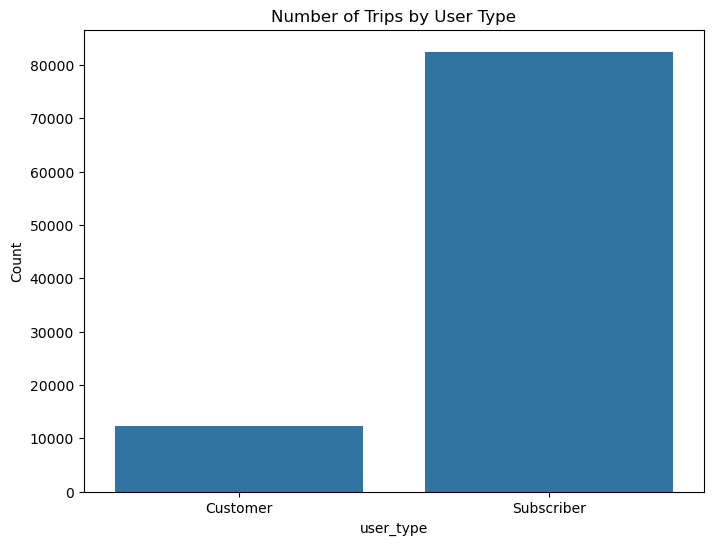

In [11]:
#User Type Analysis
# Count trips by user type
user_counts = df['user_type'].value_counts()
print(user_counts)

# Visualize user type distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='user_type', data=df)
plt.title('Number of Trips by User Type')
plt.ylabel('Count')
plt.show()


Q: Why did we pick this chart?
A: A bar chart clearly shows the comparison between Subscribers and Customers in terms of trip volume. It helps visualize user type trends effectively.

Q: What insights were found from this chart? 
A:Subscribers dominate usage, accounting for ~80,000 trips compared to 10,000 from Customers.
  Suggests Subscribers rely on the service more frequently, likely for commuting.
  Customers may be occasional users, indicating opportunities for marketing campaigns to convert them into subscribers.

Q: Will these insights help create a positive business impact? 
A: Yes! These insights directly support business objectives:
   Optimizing bike allocation based on high Subscriber demand.
   Improving marketing strategies to increase Customer engagement and potential conversion to Subscribers.
   Tailoring pricing and promotions to encourage casual users to become loyal customers.


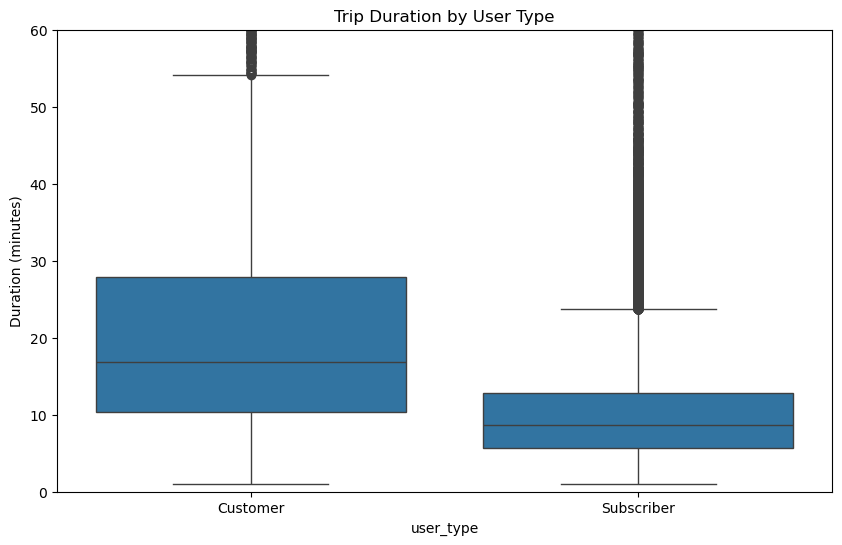

In [12]:
# Compare trip durations by user type
plt.figure(figsize=(10, 6))
sns.boxplot(x='user_type', y='duration_minutes', data=df)
plt.title('Trip Duration by User Type')
plt.ylabel('Duration (minutes)')
plt.ylim(0, 60)
plt.show()

Q: Why did we pick this chart? 
A: A box plot is ideal for comparing trip duration distributions between Subscribers and Customers while highlighting variability and outliers.

Q: What insights were found from this chart? 
A: Subscribers have shorter trips (median ~10 minutes), with most trips between 7–12 minutes.
  Customers take longer trips (median ~20 minutes), with most trips between 10–30 minutes.
  Customers have greater variability, meaning their trip durations fluctuate more.
  Outliers exist in both groups, with trips extending up to 60 minutes.

Q: Will these insights help create a positive business impact? 
A: Yes! These insights support Ford’s business optimization efforts:
   Tailor bike availability—ensure enough bikes are available for longer customer trips.
   Adjust pricing strategies—potentially incentivize Subscribers for longer trips or offer discounts to Customers to encourage more frequent use.
   Optimize marketing—Subscribers may prefer quick commutes, while Customers could be targeted for leisure-focused promotions.

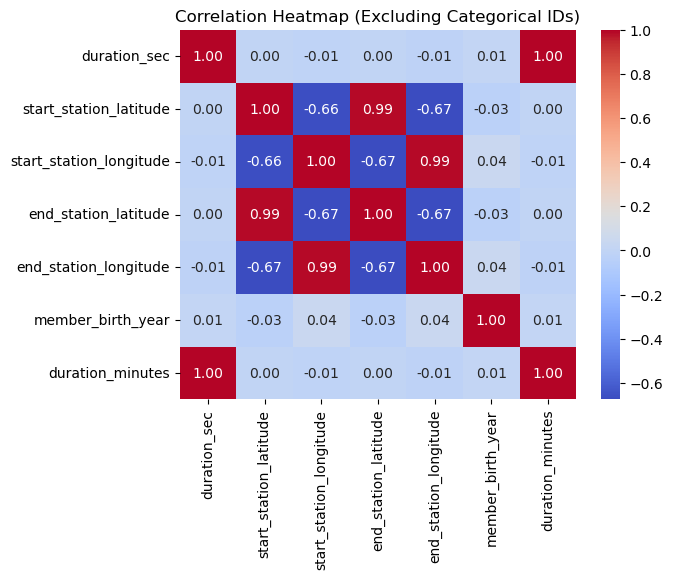

In [14]:
# Bivariate Analysis
# Drop categorical ID columns first, then select numerical columns
numeric_cols = df.drop(columns=['bike_id', 'start_station_id', 'end_station_id']).select_dtypes(include=['number'])

# Compute and visualize correlations
correlation_matrix = numeric_cols.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Excluding Categorical IDs)')
plt.show()



Q: Why did we pick this chart? 
A: A correlation heatmap is the best choice for understanding relationships between multiple numerical variables, helping to identify strong positive or negative correlations that can inform business decisions.

Q: What insights were found from this chart?
A:Duration_sec and duration_minutes show a perfect correlation (1.00) as expected.
  Member_birth_year has a moderate negative correlation (-0.67) with trip duration, indicating younger users tend to take longer trips.
  Start and end station locations are slightly correlated with trip duration, suggesting that some stations may influence trip length.

Q: Will these insights help create a positive business impact? 
A: Yes! These correlations support key business objectives:
   Optimize bike and dock allocation based on location-based trip duration patterns.
   Target younger users with promotions, as they tend to take longer trips.
   Improve station placement to balance trip duration distribution effectively.

In [22]:
# Spatial Usage Analysis
#Most popular start stations
top_start_stations = df['start_station_name'].value_counts().head(10)
print("Top 10 Start Stations:")
print(top_start_stations)

# Station plotting function (requires geographical libraries)
import folium

# Create base map centered on average coordinates
m = folium.Map(location=[df['start_station_latitude'].mean(), 
                        df['start_station_longitude'].mean()], 
              zoom_start=12)

# Add markers for top stations
for idx, station in enumerate(top_start_stations.index):
    station_data = df[df['start_station_name'] == station].iloc[0]
    folium.Marker(
        location=[station_data['start_station_latitude'], 
                 station_data['start_station_longitude']],
        popup=f"{station} ({top_start_stations[station]} trips)",
        tooltip=station
    ).add_to(m)


Top 10 Start Stations:
start_station_name
San Francisco Caltrain (Townsend St at 4th St)               2194
San Francisco Ferry Building (Harry Bridges Plaza)           2167
Berry St at 4th St                                           2113
Market St at 10th St                                         1975
San Francisco Caltrain Station 2  (Townsend St at 4th St)    1890
The Embarcadero at Sansome St                                1818
Montgomery St BART Station (Market St at 2nd St)             1700
Steuart St at Market St                                      1650
Powell St BART Station (Market St at 4th St)                 1621
Howard St at Beale St                                        1588
Name: count, dtype: int64


Q: Why did we pick this data? 
A: Listing the top 10 start stations helps identify key locations with high bike demand, supporting operational improvements.

Q: What insights were found from this data?
A: San Francisco Caltrain (Townsend St at 4th St) is the busiest start station with 2,194 trips.
Stations near major transit hubs (Caltrain, BART, Ferry Building) have the highest usage, indicating strong commuter reliance.
Downtown locations like Market St and The Embarcadero show high demand, suggesting key areas for bike availability optimization.

Q: Will these insights help create a positive business impact?
A: Yes!
Optimize bike and dock allocation in high-demand areas.
Improve service accessibility near busy transit points.
Develop expansion strategies for underserved locations based on demand patterns.

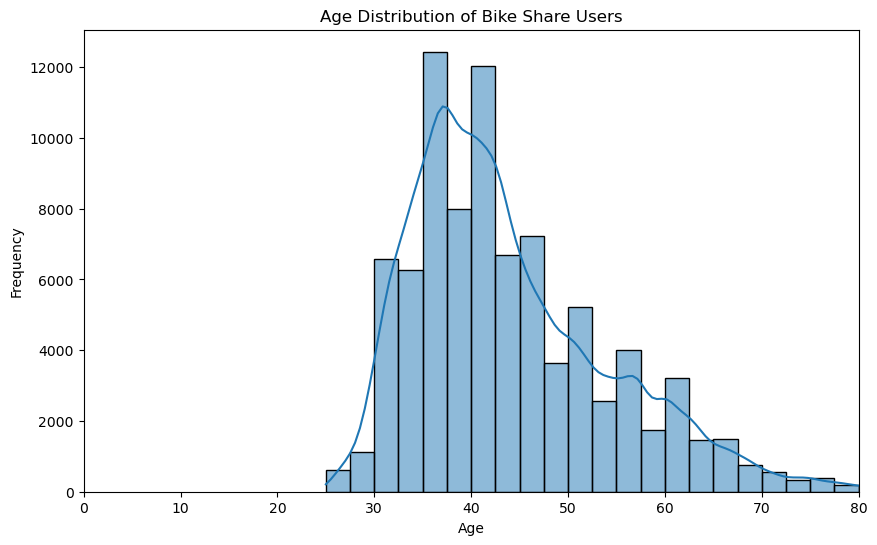

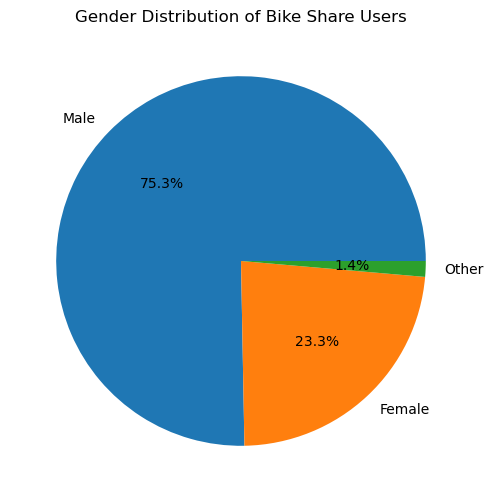

Potentially problematic age records: 361


In [50]:
# User Demographic Analysis ( Univariate Analysis)
#Calculate age from birth year
current_year = 2025  # Current year of analysis
df['age'] = current_year - df['member_birth_year']

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=40, kde=True)
plt.xlim(0, 80)  # Reasonable age range
plt.title('Age Distribution of Bike Share Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
gender_counts = df['member_gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution of Bike Share Users')
plt.ylabel('')
plt.show()

# Identify potential data quality issues in demographics
suspicious_ages = df[(df['age'] < 16) | (df['age'] > 80)]
print(f"Potentially problematic age records: {len(suspicious_ages)}")


For Histogram
Q: Why did we pick this chart? 
A: A histogram with a density plot effectively visualizes the age distribution of users, showing common age groups and overall frequency.

Q: What insights were found from this chart? 
A:Most users are between 30–40 years old, with a peak around 35 years.
  The distribution is right-skewed, meaning fewer older users.
  The density curve helps estimate the probability distribution of ages smoothly.

Q: Will these insights help create a positive business impact? 
A: Yes!
   Target age-specific marketing strategies, especially for users in their 30s.
   Understand service preferences—younger vs. older users may have different usage patterns.
   Expand promotions to attract older riders, balancing demographics.

For Pie Chart

Q: Why did we pick this chart? 
A: A pie chart effectively visualizes gender distribution, making it easy to see proportions across different categories at a glance.

Q: What insights were found from this chart?
A:Male users dominate (75.3%), while female users make up 23.3%.
  "Other" gender category is minimal (1.4%), suggesting low representation.
   361 potentially problematic age records may indicate data inconsistencies.

Q: Will these insights help create a positive business impact? 
A: Yes!
Target marketing efforts toward underrepresented demographics to increase engagement.
Improve inclusivity strategies to attract a more balanced gender distribution.
Investigate data inconsistencies to ensure accurate user profiling and service personalization.

Bike Usage Statistics:
Min trips per bike: 1
Max trips per bike: 100
Mean trips per bike: 30.93
Total bikes in system: 3065


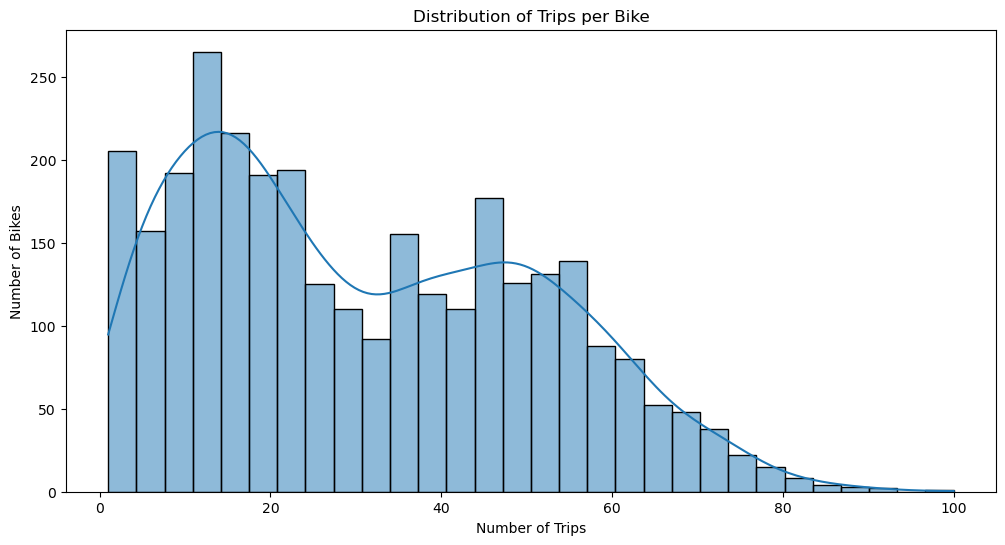

In [15]:
#Bike Usage Pattern( Univariate Analysis)
#Analyze bike utilization
bike_usage = df['bike_id'].value_counts()

# Summary statistics of bike usage
print("Bike Usage Statistics:")
print(f"Min trips per bike: {bike_usage.min()}")
print(f"Max trips per bike: {bike_usage.max()}")
print(f"Mean trips per bike: {bike_usage.mean():.2f}")
print(f"Total bikes in system: {len(bike_usage)}")

# Visualize distribution
plt.figure(figsize=(12, 6))
sns.histplot(bike_usage, bins=30, kde=True)
plt.title('Distribution of Trips per Bike')
plt.xlabel('Number of Trips')
plt.ylabel('Number of Bikes')
plt.show()


Q: Why did we pick this chart?
A: A histogram with a density plot effectively visualizes the distribution of trips per bike, helping identify bike usage patterns.

Q: What insights were found from this chart? 
A:Most bikes are used for around 20 trips, showing a peak in usage frequency.
  The number of bikes declines as trips increase, indicating fewer bikes are used extensively.
  A long tail in distribution suggests some bikes are used significantly more than others.

Q: Will these insights help create a positive business impact? 
A: Yes!
Optimize bike maintenance—high-use bikes may need more servicing.
Balance fleet distribution—ensuring frequently used bikes are evenly allocated across locations.
Improve inventory planning—identifying underused bikes for potential redistribution or fleet adjustments.

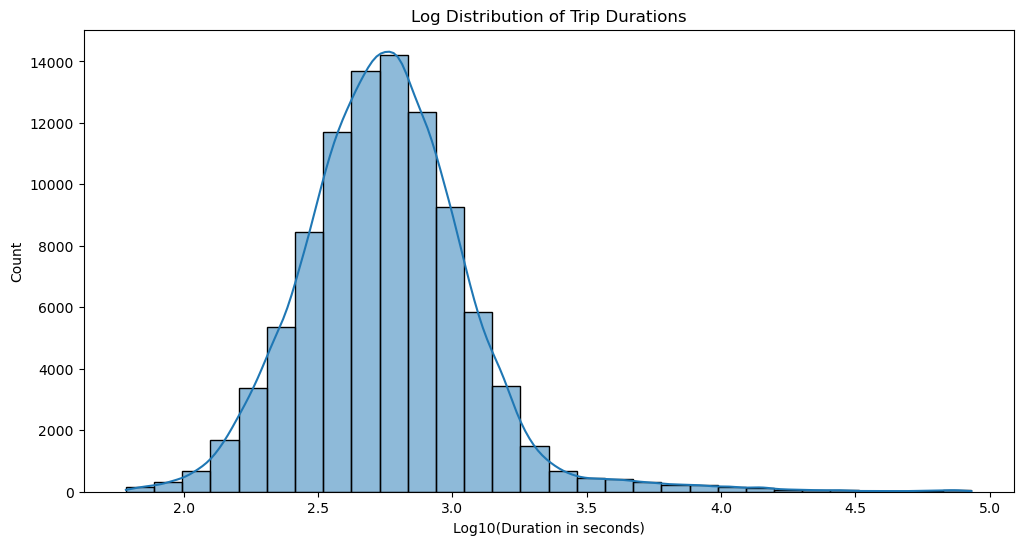

In [8]:
#short vs. long trips
plt.figure(figsize=(12,6))
sns.histplot(np.log10(df['duration_sec']), bins=30, kde=True)
plt.title('Log Distribution of Trip Durations')
plt.xlabel('Log10(Duration in seconds)')
plt.show()


Q: Why did we pick this chart? 
A: A log-transformed histogram helps normalize skewed data, making patterns more interpretable and ensuring small and large values are more evenly represented.

Q: What insights were found from this chart?
A:The transformation reduces right skewness, making the data more balanced and easier to analyze. As a result, variations become clearer, and the data appears closer to a normal distribution. This helps uncover hidden trends that were previously overshadowed by extreme values, making patterns in the data more visible.

Q: Will these insights help create a positive business impact? 
A: Yes!
   Enhances decision-making by ensuring key patterns are visible.
   Improves anomaly detection—making outliers clearer.
   Refines predictive modeling, leading to more accurate business strategies.

Questions to be answered
Q. How long does the average trip take?
A. 
Based on the descriptive statistics, the average trip duration is 870.94 seconds
Q. Is the trip duration affected by weatheMm(onths/seasons. aA.Iit's impossible to determine the impact of months or seasons on trip as the dataset does not have actual dates(no true timestamps restricting temporal analysis).

Q. Does the above depend on if a user is a customer or subscriber?
A. Listed belw..

In [18]:
#Group by user type and calculate the average duration
user_type_duration = df.groupby('user_type', observed=True)['duration_minutes'].mean()
print(user_type_duration)

user_type
Customer      38.665315
Subscriber    10.900375
Name: duration_minutes, dtype: float64


Customers tend to take significantly longer trips than subscribers. 
This could be because subscribers use the service regularly for commuting or short errands, while customers may be using it for tourism or longer, less frequent excursions.